# Problem set 3

# Question1


Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations



Step 1. Import the necessary libraries

In [1]:
import pandas as pd

Step 2. Import the dataset from this address. Step 3. Assign it to a variable called users 

In [3]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation 

In [9]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

In [4]:
male_users=users[users['gender']=='M']
male = male_users.groupby(['occupation','gender']).gender.count()
total = users.groupby(['occupation']).gender.count()
male_ratio=((male/total)*100).sort_values(ascending=False)
print(male_ratio)

occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
Name: gender, dtype: float64


Step 6. For each occupation, calculate the minimum and maximum ages

In [6]:
users.groupby('occupation').agg({'age': ['min', 'max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

Step 7. For each combination of occupation and sex, calculate the mean age

In [7]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

 Step 8. For each occupation present the percentage of women and men

In [8]:
gender =users.groupby(['occupation','gender']).gender.count()
total_count=users.groupby(['occupation']).gender.count()
percent=((gender/total_count)*100)
percent

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

Euro Teams


Step 1. Import the necessary libraries

In [10]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address               
Step 3. Assign it to a variable called euro12

In [12]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 4. Select only the Goal column 

In [14]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012? 

In [16]:
euro12.Team.count()

16

Step 6. What is the number of columns in the dataset?

In [15]:
euro12.shape[1]

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline 

In [17]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


 Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [20]:
cards = discipline.sort_values(by=['Red Cards','Yellow Cards'])
cards

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [42]:
discipline["Yellow Cards"].mean()

7.4375

Step 10. Filter teams that scored more than 6 goalsStep

In [47]:
euro12[(euro12['Goals']>6)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G 

In [49]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [51]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 13. Select all columns except the last 3

In [21]:
except_last=euro12.iloc[:-3:]
except_last

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [23]:
Shooting_Acu = euro12[euro12['Team'].isin(['Italy','Russia','England'])]
Shooting_Acu[['Shooting Accuracy','Team']]

,Shooting Accuracy,Team
3,50.0%,England
7,43.0%,Italy
12,22.5%,Russia


# Question 3

Housing
Step 1. Import the necessary libraries



In [28]:
import numpy as np 
import pandas as pd
import random

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [29]:
series_1 = pd.Series(np.random.randint(1, high=5, size=100))
print(series_1)

0     1
1     1
2     1
3     3
4     3
     ..
95    1
96    2
97    2
98    1
99    3
Length: 100, dtype: int32


In [30]:
series_2 = pd.Series(np.random.randint(1, high=4, size=100))
print(series_2)

0     3
1     1
2     2
3     3
4     1
     ..
95    3
96    2
97    3
98    3
99    1
Length: 100, dtype: int32


In [31]:
series_3 = pd.Series(np.random.randint(10000, high=300001,size=100))
print(series_3)

0     193410
1     292293
2      25582
3     101886
4      19093
       ...  
95    251424
96    220859
97     42008
98    170308
99    160672
Length: 100, dtype: int32


Step 3. Create a DataFrame by joinning the Series by column Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [34]:
df = pd.DataFrame(series_1, columns=['bedrs'])
df['bathrs'] = series_2
df['price_sqr_meter'] = series_3
df

,bedrs,bathrs,price_sqr_meter
0,1,3,193410
1,1,1,292293
2,1,2,25582
3,3,3,101886
4,3,1,19093
...,...,...,...
95,1,3,251424
96,2,2,220859
97,2,3,42008
98,1,3,170308


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

In [36]:
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3], axis=0))
bigcolumn

,0
0,1
1,1
2,1
3,3
4,3
...,...
95,251424
96,220859
97,42008
98,170308


Step 6. Ops it seems it is going only until index 99. Is it true?

yes

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [38]:
bigcolumn.reset_index()

,index,0
0,0,1
1,1,1
2,2,1
3,3,3
4,4,3
...,...,...
295,95,251424
296,96,220859
297,97,42008
298,98,170308


# Question 4 

Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries  Step 2. Import the dataset from the attached file wind.txt

In [2]:
import pandas as pd
import numpy as np
import datetime

data = pd.read_csv('wind.txt',sep="\s+")
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

In [3]:
data=pd.read_csv("wind.txt", sep="\s+", parse_dates=[[0,1,2]])
data 

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

In [7]:
#define the function for years
def correct_year(y):
    yrs=y.year                
    if y.year > 2000:          
        yrs = y.year - 10   
    else: 
        y.year                 
    return datetime.date(yrs,y.month,y.day)   

data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(correct_year)

data      

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns]

In [8]:
data=data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

In [9]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [11]:
new_data = data.dropna(axis=0)
new_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 7. Compute how many non-missing values there are in total

In [12]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.

In [13]:
new_data.mean()

RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.

In [14]:
loc_stats = pd.DataFrame()
loc_stats['Minimum'] = new_data.min()
loc_stats['Maximum'] = new_data.max()
loc_stats['Mean'] = new_data.mean()
loc_stats['Standard Deviations'] = new_data.std()
loc_stats

,Minimum,Maximum,Mean,Standard Deviations
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day

In [15]:
day_stats=pd.DataFrame()
day_stats['Mean']=new_data.mean(axis=1)
day_stats['Minimum']=new_data.min(axis=1)
day_stats['Maximum']=new_data.max(axis=1)
day_stats['Standard Deviations']=new_data.std(axis=1)
day_stats.head()

,Mean,Minimum,Maximum,Standard Deviations
Yr_Mo_Dy,,,,
1961-01-04,6.619167,1.79,11.75,3.198126
1961-01-05,10.630000,6.17,13.33,2.445356
1961-01-06,8.240000,4.42,13.21,2.998063
1961-01-07,10.385000,4.96,14.29,3.072114
1961-01-08,10.487500,5.91,16.62,3.547237


# Question 5

Step 1. Import the necessary libraries


In [1]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address.         
Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo   

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [127]:
len(chipo.index)  

4622

Step 6. What is the number of columns in the dataset?


In [7]:
len(chipo.columns)

5

Step 7. Print the name of all the columns

In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?


In [10]:
chipo.index 

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [13]:
most_orders=chipo.groupby('item_name').sum()                    
most_orders = most_orders.sort_values(['quantity'], ascending=False)
most_orders.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 10. For the most-ordered item, how many items were ordered?

In [14]:
most_orders[['quantity']].head(1)

,quantity
item_name,
Chicken Bowl,761


Step 11. What was the most ordered item in the choice_description column?

In [18]:
choice_description= chipo.groupby(['choice_description']).sum().sort_values('quantity', ascending=False).head(1)
choice_description

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12. How many items were orderd in total?

In [15]:
chipo.quantity.sum()

4972

Step 13. 
• Turn the item price into a float    


In [3]:
new_chipo = chipo.copy()
new_chipo['item_price'] = new_chipo['item_price'].str[1:]
new_chipo.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

• Check the item price type   

In [4]:
chipo.dtypes['item_price']

dtype('O')

• Create a lambda function and change the type of item price  

In [5]:
chipo['item_price'] = chipo.apply(lambda a: float(a['item_price'].replace('$', '')),axis=1)

• Check the item price type 

In [6]:
chipo.item_price.dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [23]:
(chipo.item_price*chipo.quantity).sum()

39237.02


Step 15. How many orders were made in the period?

In [26]:
chipo.order_id.value_counts().count()

1834

Step 16. What is the average revenue amount per order?

In [24]:
average_revenue =(chipo.item_price*chipo.quantity).sum()/chipo['order_id'].nunique()
average_revenue 

21.39423118865867

Step 17. How many different items are sold?


In [25]:
chipo.item_name.value_counts().count()

50

# Question 6


Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [106]:
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [108]:
rlsp_status  = df.set_index('Year')

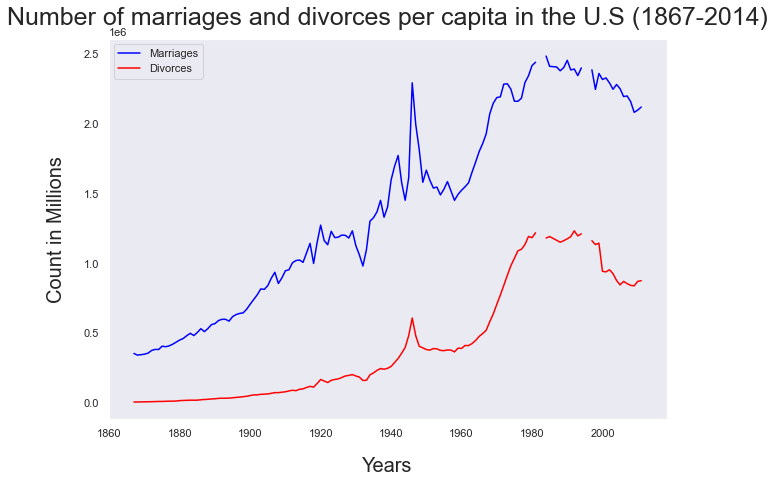

In [129]:
rlsp_status['Marriages'].plot(figsize=(10, 7), color='blue')
rlsp_status['Divorces'].plot(figsize=(10, 7), color='red')
label = ['Marraiges' , 'Divorces']
plt.legend();
plt.grid(b=None)
plt.xlabel("Years", labelpad=18, fontsize=20)
plt.ylabel('Count in Millions', labelpad=18, fontsize=20)
plt.title("Number of marriages and divorces per capita in the U.S (1867-2014)", y=1.02, fontsize=25);

# Question7


Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
rlsp_status = df.loc[df.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
rlsp_status

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


([<matplotlib.axis.XTick at 0x1f84652a940>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

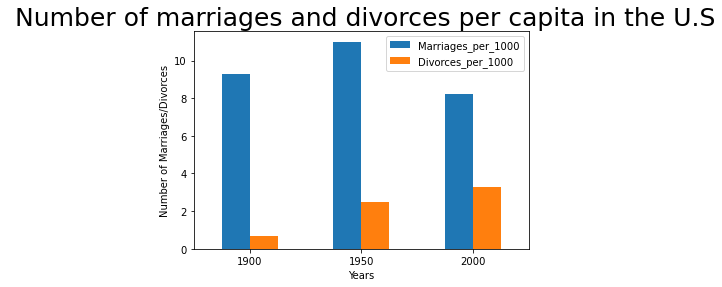

In [36]:
rlsp_status[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title(" Number of marriages and divorces per capita in the U.S", color = 'Black', fontsize = 25)
plt.xlabel('Years', color = 'k', fontsize = 10)
plt.ylabel('Number of Marriages/Divorces', color = 'k', fontsize = 10)

positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

# Question 8


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
actor_kill = pd.read_csv('actor_kill_counts.csv')

In [36]:
actor_kill = actor_kill.sort_values(by = 'Count',ascending = False)
actor_kill

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


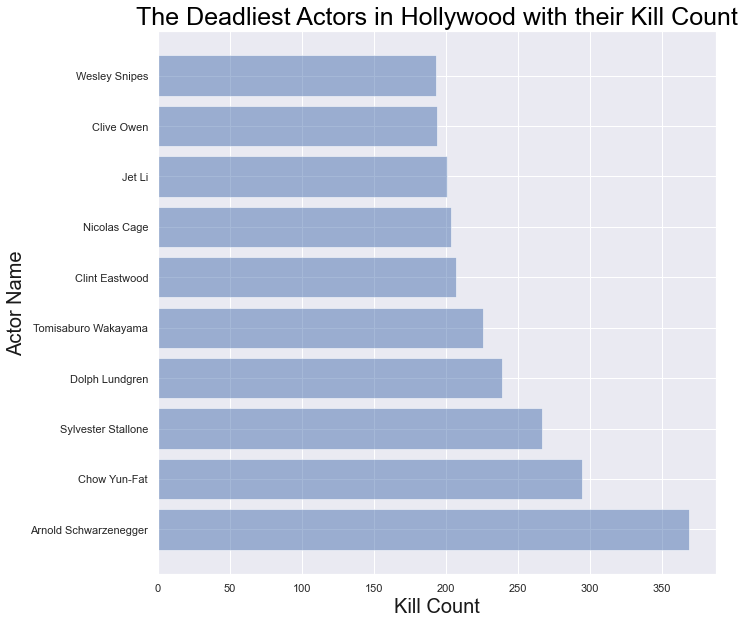

In [37]:
actor = actor_kill['Actor']
count = actor_kill['Count']
plt.rcParams["figure.figsize"] = (10, 10)
plt.barh(actor, count, align='center', alpha=0.5)

plt.title('The Deadliest Actors in Hollywood with their Kill Count', fontsize=25, color = 'Black')
plt.xlabel('Kill Count', color = 'k', fontsize = 20)
plt.ylabel('Actor Name', color = 'k', fontsize = 20)
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.  
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RM_emperor = pd.read_csv('roman-emperor-reigns.csv')
RM_emperor .head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


Text(0.5, 1.0, 'Pie chart-Roman Emperors that were assassinated')

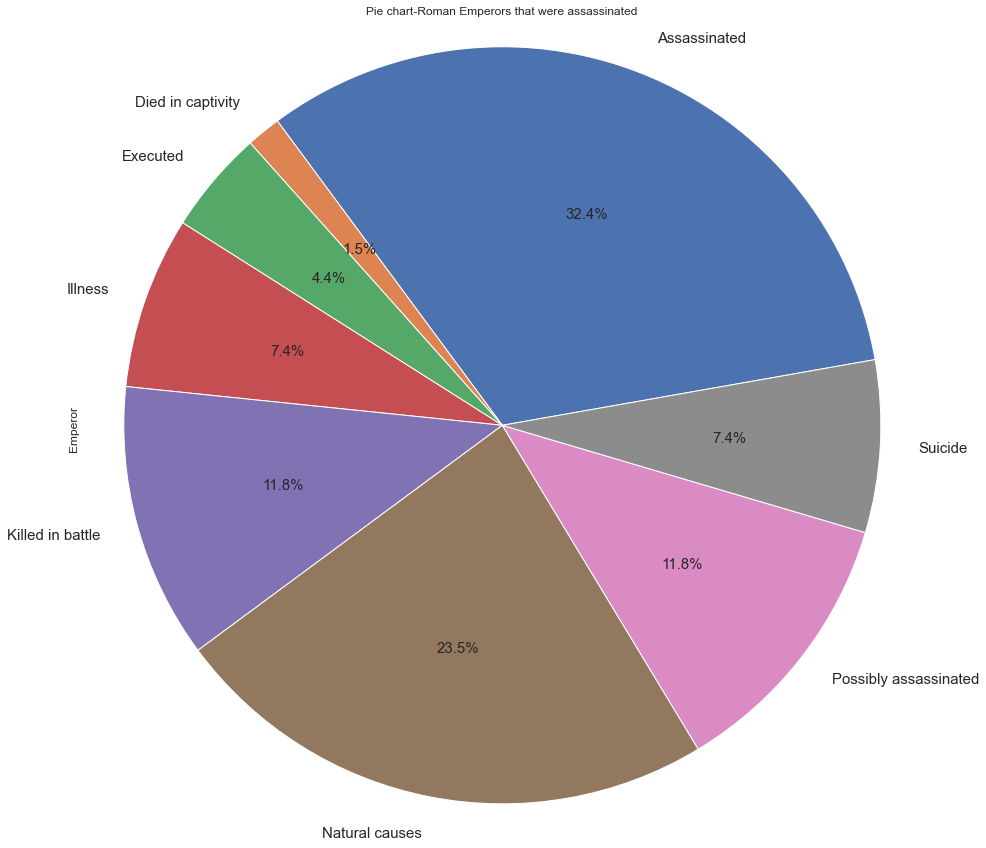

In [31]:
labels = RM_emperor.Cause_of_Death
sizes = RM_emperor.Length_of_Reigndeath = RM_emperor.groupby('Cause_of_Death').Emperor.count()
fig, ax = plt.subplots(figsize=(20,20))

death.plot.pie(y='Cause_of_Death', figsize=(15, 15), autopct='%1.1f%%', startangle=10, textprops={'fontsize': 15})

plt.axis('equal')
plt.title('Pie chart-Roman Emperors that were assassinated')

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.   
Don't forget to label your axes!
Color each dot according to its year.

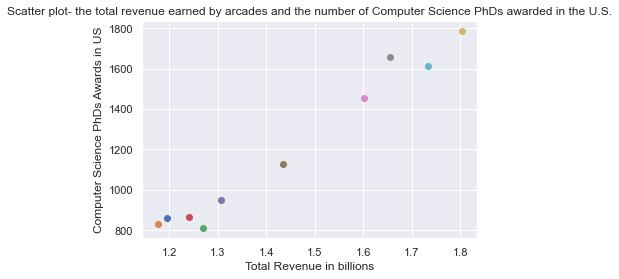

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
US_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
fig, ax = plt.subplots()
for j in range(len(US_data['Year'])):
    ax.scatter(US_data['Total Arcade Revenue (billions)'][j], US_data['Computer Science Doctorates Awarded (US)'][j])
ax.set_title('Scatter plot- the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S.')
ax.set_xlabel('Total Revenue in billions')
ax.set_ylabel('Computer Science PhDs Awards in US')

plt.show()